In [ ]:
# This notebook demonstrates some techniques for fitting and evaluating classification models.

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, ShuffleSplit
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs

In [86]:
# Generate some data

X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1, random_state=2)

# Try it with blob data too
# note - some metrics are not supported for multicalss data
#X, y = make_blobs(n_samples=1000, n_features=2, centers=3,cluster_std=2, random_state=1) 

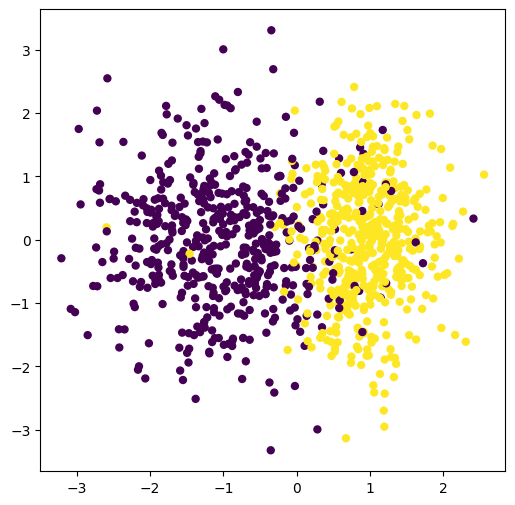

In [87]:
# Plot data with color to indicate class

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25)

In [88]:
# Check class distribution

unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{0: 502, 1: 498}

In [89]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [90]:
# Cross validation using the logistic regression classifier
clf = LogisticRegression(random_state=0)
scores = cross_val_score(clf, X_train, y_train, cv=5)
print(scores)
print("%0.3f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

[0.925  0.925  0.9625 0.8875 0.9   ]
0.920 accuracy with a standard deviation of 0.026


In [91]:
# Cross validation using the random forest classifier
rf_clf = RandomForestClassifier(random_state=0)
scores = cross_val_score(rf_clf, X_train, y_train, cv=5)
print(scores)
print("%0.3f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

[0.925   0.925   0.93125 0.875   0.8625 ]
0.904 accuracy with a standard deviation of 0.029


In [92]:
# Cross validation using the Gaussian Naive Bayes algorithm
gnb_clf = gnb = GaussianNB()
scores = cross_val_score(gnb_clf, X_train, y_train, cv=5)
print(scores)
print("%0.3f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

[0.925   0.91875 0.9625  0.88125 0.90625]
0.919 accuracy with a standard deviation of 0.027


In [93]:
# Check a dummy classifier
dummy_clf_uni = DummyClassifier(strategy="uniform", random_state=0)
dummy_clf_uni.fit(X_train, y_train)
print(dummy_clf_uni.score(X_test,y_test))

0.515


In [94]:
# Look at some other metric for the best model

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
lr_predicted = clf.predict(X_test)

# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall) 
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, lr_predicted)))
print('Precision: {:.2f}'.format(precision_score(y_test, lr_predicted)))
print('Recall: {:.2f}'.format(recall_score(y_test, lr_predicted)))
print('F1: {:.2f}'.format(f1_score(y_test, lr_predicted)))

Accuracy: 0.95
Precision: 0.93
Recall: 0.98
F1: 0.95


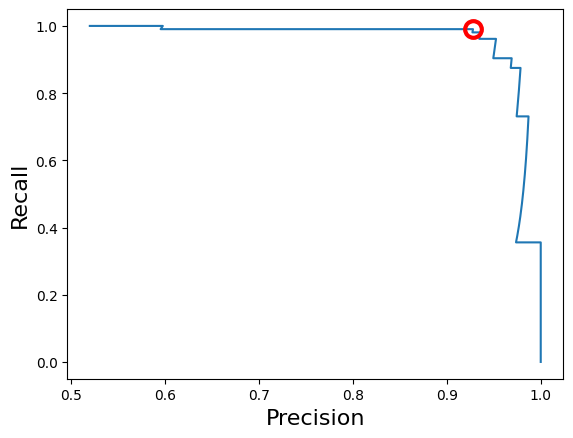

In [95]:
clf = LogisticRegression(random_state=0)
y_scores_lr = clf.fit(X_train, y_train).decision_function(X_test)

from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.show()

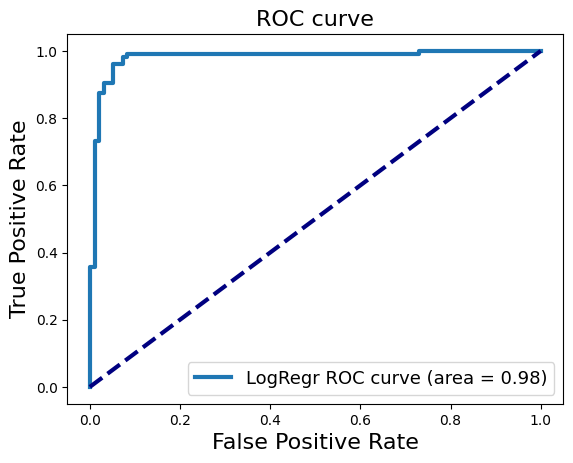

In [58]:
from sklearn.metrics import roc_curve, auc

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_scores_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.show()

In [50]:
# get confusion matrix
confusion = confusion_matrix(y_test, lr_predicted)
confusion

array([[ 88,   8],
       [  2, 102]])

In [96]:
# Perform a simple grid search with our best model

clf = LogisticRegression(random_state=0)
grid_values = {'C': [0.1, 0.5, 1], 'solver': ['lbfgs', 'sag', 'saga']}

# default metric to optimize over grid parameters is accuracy
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values)
grid_clf_acc.fit(X_train, y_train)


print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)

Grid best parameter (max. accuracy):  {'C': 1, 'solver': 'lbfgs'}
Grid best score (accuracy):  0.9200000000000002
